In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pn
import matplotlib.pyplot as plt


%matplotlib inline

In [4]:
data = pd.read_csv('AB_Test_Results.csv')
data.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [5]:
print(" DESCRIBE ".center(80,'-'))
print(data.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]).T)

----------------------------------- DESCRIBE -----------------------------------
           count         mean          std  min   0%     10%     20%     30%  \
USER_ID  10000.0  4981.080200  2890.590115  2.0  2.0  1008.8  1962.6  2947.0   
REVENUE  10000.0     0.099447     2.318529  0.0  0.0     0.0     0.0     0.0   

            40%     50%     60%     70%     80%     90%      100%       max  
USER_ID  3940.6  4962.0  5965.0  6994.0  8011.0  8998.0  10000.00  10000.00  
REVENUE     0.0     0.0     0.0     0.0     0.0     0.0    196.01    196.01  


In [6]:
print(data.VARIANT_NAME.isna().sum())
print(data.REVENUE.isna().sum())

0
0


In [7]:
control_g = data[data['VARIANT_NAME'] == 'control']#[['USER_ID','REVENUE']]
test_g = data[data['VARIANT_NAME'] == 'variant']#[['USER_ID','REVENUE']]

print(len(control_g),len(test_g))

4984 5016


In [8]:
overlaps = control_g[control_g['USER_ID'].isin(test_g['USER_ID'])]['USER_ID']
len(overlaps)

1958

In [9]:
# overlaps
clear_control = control_g[~control_g['USER_ID'].isin(overlaps)]
clear_test = test_g[~test_g['USER_ID'].isin(overlaps)]

In [15]:
print((clear_control['USER_ID'].value_counts()>1).sum())
print((test_g['USER_ID'].value_counts()>1).sum())

556
924


In [16]:
sum_clear_control = clear_control.groupby('USER_ID').REVENUE.sum()
sum_clear_test = clear_test.groupby('USER_ID').REVENUE.sum()

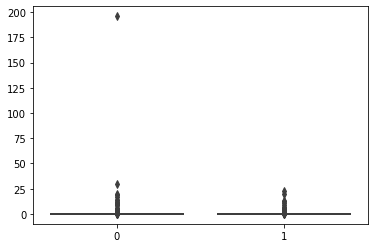

In [17]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=[sum_clear_control, sum_clear_test], palette="Set2")
# plt.title("Boxplots of Two Datasets")
# plt.xlabel("Dataset")
# plt.ylabel("Score")
# plt.show()

ax = sns.boxplot(data=[sum_clear_control, sum_clear_test], notch=True, palette="flare")

In [ ]:
zero_rev_control = control_g[control_g['REVENUE'] == 0]['USER_ID']
above_zero_rev_control = control_g[control_g['REVENUE'] > 0]['USER_ID']

double_control = zero_rev_control[zero_rev_control.isin(above_zero_rev_control)==True]

# control_g[control_g['USER_ID'].isin(double_control)]
double_control

110     6207
342     4918
376      701
746     5769
937     1035
1015     831
1081    1252
1093    2252
1765    8479
1789    9766
2120    6678
2261    5134
2617    1053
2645    4918
2853    1053
2991     487
3166    7930
3211    4870
3443    1883
3455    4209
3543    6492
3988    8583
4572    2489
4583     868
4804    1939
5013    8471
5024     282
5087    3699
5345    6678
5564    5205
5622    2181
5648    8920
6106    6271
6155    5270
6280     169
6310    3566
6771    8020
7292    7358
7383    1252
7514    1053
7590    5205
8027     124
8153    2166
8351    3198
8676     124
8690    5900
8904    7613
9417    6429
9564    8700
Name: USER_ID, dtype: int64

In [ ]:
control_g[control_g['USER_ID']==4870]

,USER_ID,REVENUE
3211,4870,0.0
3216,4870,2.0


In [ ]:
control_g[control_g[control_g['REVENUE'] == 0]['USER_ID'].isin(control_g[control_g['REVENUE'] > 0]['USER_ID'])]

<ipython-input-84-2738a959b292>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control_g[control_g[control_g['REVENUE'] == 0]['USER_ID'].isin(control_g[control_g['REVENUE'] > 0]['USER_ID'])]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
print(len(control_g['USER_ID'])-len(control_g['USER_ID'].drop_duplicates()))
print(len(test_g['USER_ID'])-len(test_g['USER_ID'].drop_duplicates()))

1053
1082


In [ ]:
print(len(control_g['USER_ID'])-len(control_g[['USER_ID','REVENUE']].drop_duplicates()))
print(len(test_g['USER_ID'])-len(test_g[['USER_ID','REVENUE']].drop_duplicates()))

1011
1056


In [ ]:
control_g[control_g['USER_ID']==2423]

,USER_ID,REVENUE
1,2423,0.0
5243,2423,0.0


In [ ]:
test_g[test_g['USER_ID']==2423]

,USER_ID,REVENUE
8556,2423,0.0


In [ ]:
stat_df = df.groupby(['variant_name'], as_index=False).agg(
    converted_users = ('revenue', lambda x: x[x > 0].count()),
    all_users = ('user_id', lambda x: len(x)),
    revenue =  ('revenue', lambda x: sum(x))
)

stat_df['conversion'] = stat_df['converted_users']/stat_df['all_users']
stat_df['arpu'] = stat_df['revenue']/stat_df['all_users']
stat_df['arppu'] = stat_df['revenue']/stat_df['converted_users']

stat_df